In [2]:
import pandas as pd

In [3]:
fifa = pd.read_csv("../Datasets/fifa_data.csv")

<h1>Box Plot</h1>

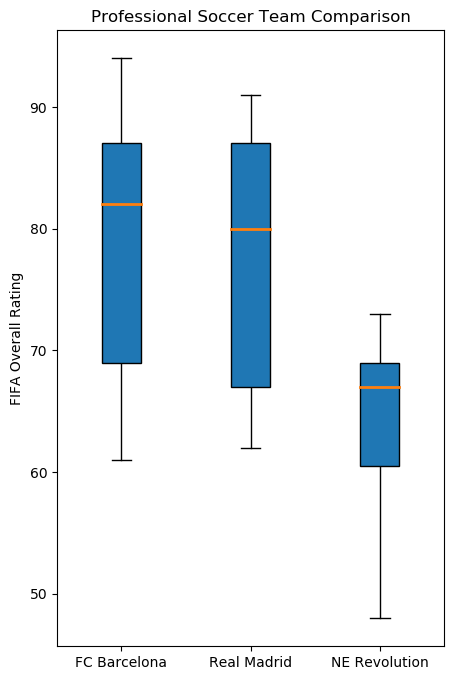

In [7]:
import matplotlib.pyplot as plt

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

plt.figure(figsize=(5,8), dpi=100)
plt.style.use('default')
plt.boxplot([barcelona, madrid, revs], labels=['FC Barcelona','Real Madrid','NE Revolution'], patch_artist=True, medianprops={'linewidth': 2})
plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')
plt.show()

<h1>Bar Chart</h1>

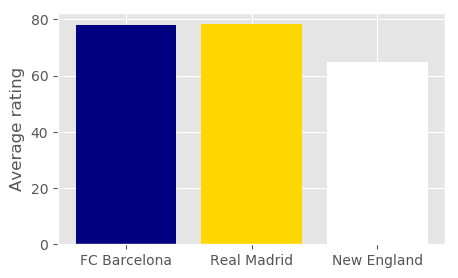

In [23]:
import matplotlib.pyplot as plt

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "New England Revolution"]['Overall']

labels = ['FC Barcelona', 'Real Madrid', 'New England']
values = [barcelona.mean(),madrid.mean(),revs.mean()]
colors = ["navy","gold","white"]

plt.style.use('ggplot')
plt.figure(figsize=(5,3), dpi=100)
plt.bar(labels, values, color=colors)
plt.ylabel("Average rating")
plt.show()

<h1>Pie Chart</h1>

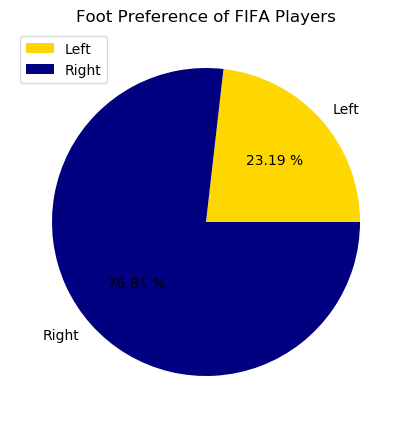

In [31]:
import matplotlib.pyplot as plt

left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
Values = [left,right]
colors = ['gold', 'navy']

plt.figure(figsize=(8,5))
plt.style.use('default')
plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Foot Preference of FIFA Players')
plt.legend()
plt.show()

<h1>Histogram</h1>

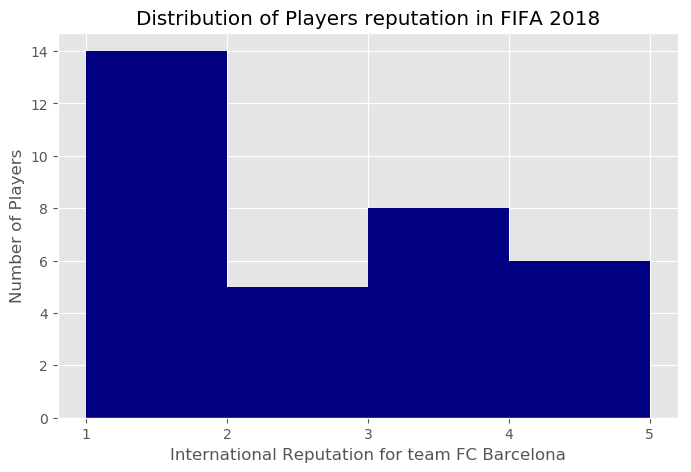

In [68]:
import numpy as np
import matplotlib.pyplot as plt

bins = fifa.loc[fifa.Club == "FC Barcelona"]['International Reputation']
bins = bins.tolist()
bins = np.unique(bins)
width = bins[1]-bins[0]

plt.figure(figsize=(8,5))
plt.style.use('ggplot')
plt.hist(fifa.loc[fifa.Club == "FC Barcelona"]['International Reputation'], bins=bins, color='navy',width=width)
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel('International Reputation for team FC Barcelona')
plt.title('Distribution of Players reputation in FIFA 2018')

plt.show()

<h1>Quantile Quantile Plot</h1>

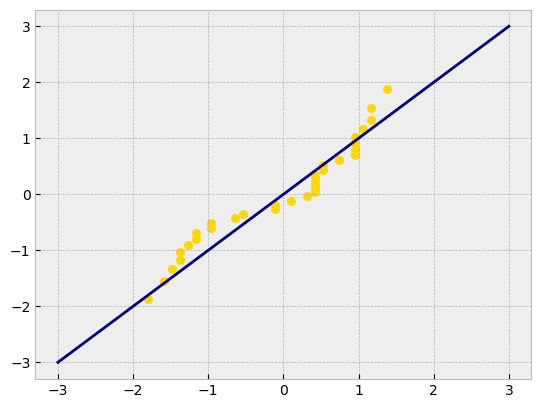

In [136]:
import numpy as np
import re
from scipy.special import ndtri
import matplotlib.pyplot as plt

data = fifa.loc[fifa.Club == "FC Barcelona"][["Overall","Potential"]].reset_index()
data = data.sort_values(by=['Overall'],ascending=True).reset_index()

data['count'] = data.index+1
n_rows = data.shape[0]

data['percentile_area'] = (data['count'])/n_rows
data['z_theoritical'] = ndtri(data['percentile_area'])
data['z_actual'] = (data['Overall'] - data['Overall'].mean())/data['Overall'].std(ddof=0)

plt.style.use('bmh')
plt.scatter(data.z_actual, data.z_theoritical,color="gold")
plt.plot([-3,-2,-1,0,1,2,3],[-3,-2,-1,0,1,2,3],'navy')
plt.show()